# Learning and practicing NumPy with examples and exercises

In [1]:
import numpy as np

In [ ]:
arr = np.array([3, 7, 1, 9, 5])
print(f"Third: {arr[2]}\nSlice: {arr[1:4]}")

#Change fourth element
print(arr)
arr[3] = 12
print(arr)


In [4]:
tensor = np.array(range(1,37)).reshape(3,3,4)
print(f"Tensor: \n{tensor}")
print(f"Element (1, 0, 2): {tensor[1,0,2]} \n")
print(f"Subtensor: \n {tensor[1]} \n")
print(f"Subtensor: \n {tensor[1:3,2,:]}\n")
print(f"Element (2, 1, 3): {tensor[2,1,3]}\n")
print(f"Subtensor: \n {tensor[1:3,0, :]}")


Tensor: 
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]

 [[25 26 27 28]
  [29 30 31 32]
  [33 34 35 36]]]
Element (1, 0, 2): 15 

Subtensor: 
 [[13 14 15 16]
 [17 18 19 20]
 [21 22 23 24]] 

Subtensor: 
 [[21 22 23 24]
 [33 34 35 36]]

Element (2, 1, 3): 32

Subtensor: 
 [[13 14 15 16]
 [25 26 27 28]]


In [ ]:
def calculate_average(nums: list) -> float:
    arr = np.array(nums)
    return np.mean(arr)
numbers = list(range(1,11))
print(f"Average of {calculate_average(numbers)}")

In [ ]:
def find_power(base, exponent=2):
    return np.pow(base, exponent)
print(find_power(2))

Shape of X: (5, 2) 
Shape of y: (5, 1)
Iteración 0: theta = [0.0082 0.0296], Error = 399.0
Después de 1000 iteraciones:
theta0 = 0.6941
theta1 = 2.5016


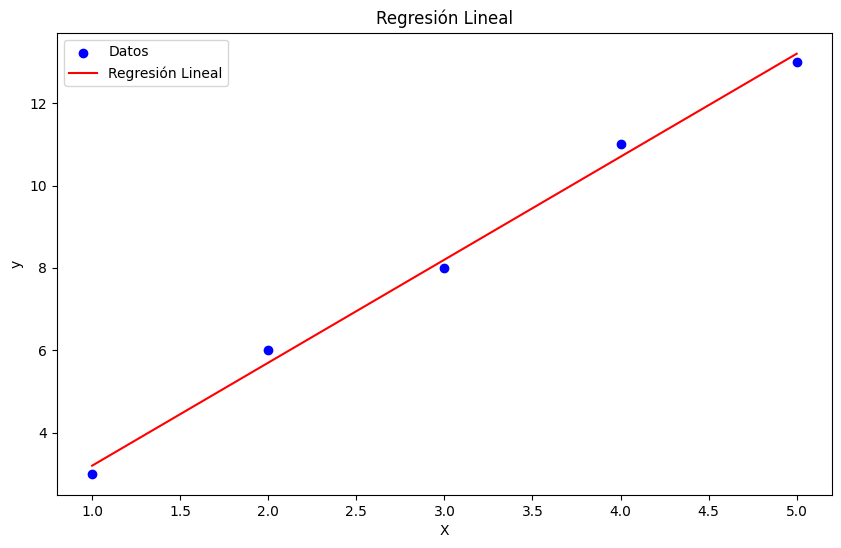

In [2]:
X = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([3,6,8,11,13]).reshape(-1,1)

#Bias term
X = np.c_[np.ones(X.shape[0]), X]

print(f"Shape of X: {X.shape} \nShape of y: {y.shape}")

theta = np.array([0.0, 0.0]).reshape(2,1)

alpha = 0.001
iterations = 1000

theta_history = []
error_history = []
m = len(y)
for i in range(iterations):
    error = ((X@theta - y).T @ (X@theta-y)).item()
    theta_history.append(theta.flatten())
    error_history.append(error)


    grad = (1/m) * X.T @ (X@theta - y)
    theta = theta - alpha*grad
    

    if i % 2000 == 0:
        print(f"Iteración {i}: theta = {theta.flatten()}, Error = {round(error, 10)}")

# Resultados
print(f"Después de {iterations} iteraciones:")
print(f"theta0 = {theta[0, 0]:.4f}")
print(f"theta1 = {theta[1, 0]:.4f}")

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, color='blue', label='Datos')
plt.plot(X[:, 1], X @ theta, color='red', label='Regresión Lineal')
plt.title('Regresión Lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


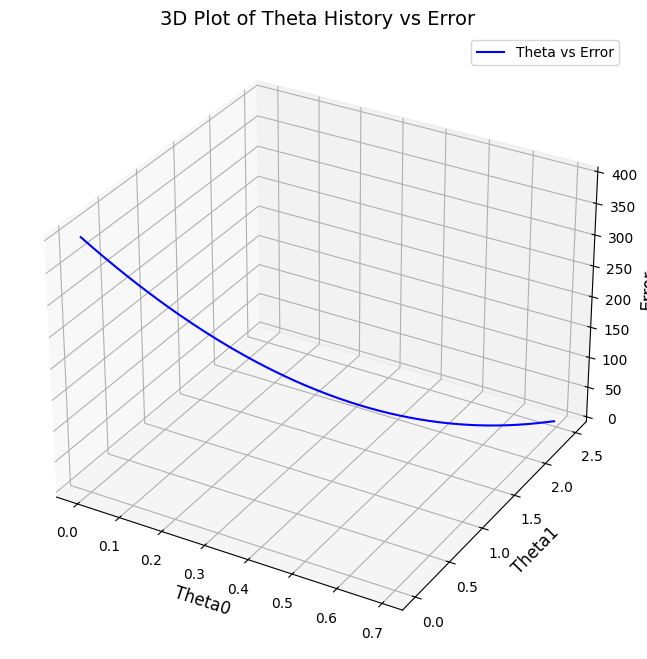

In [3]:
# Convert theta_history to a NumPy array for easier manipulation
theta_history = np.array(theta_history)

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot theta0, theta1, and error
ax.plot(theta_history[:, 0], theta_history[:, 1], error_history, label='Theta vs Error', color='blue')

# Add labels and title
ax.set_title('3D Plot of Theta History vs Error', fontsize=14)
ax.set_xlabel('Theta0', fontsize=12)
ax.set_ylabel('Theta1', fontsize=12)
ax.set_zlabel('Error', fontsize=12)

# Show legend and plot
ax.legend()
plt.show()

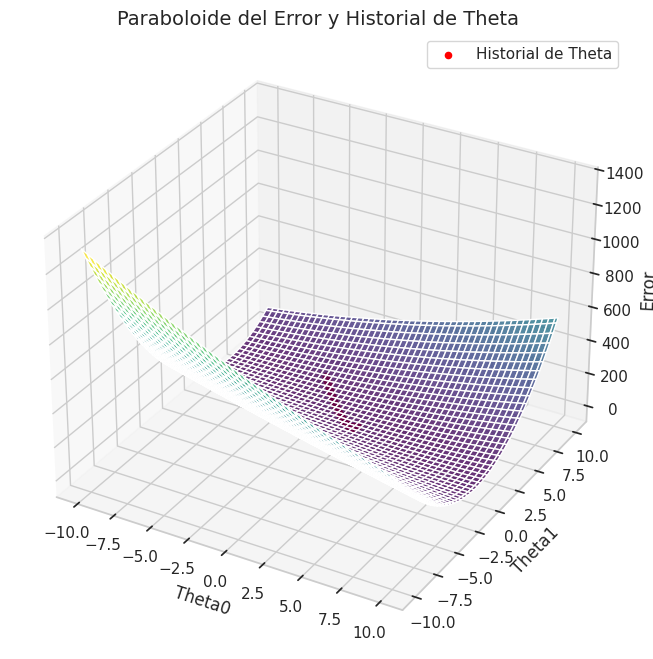

In [8]:
# Crear una cuadrícula de valores para theta0 y theta1
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-10, 10, 100)
theta0_grid, theta1_grid = np.meshgrid(theta0_vals, theta1_vals)

# Calcular el error para cada combinación de theta0 y theta1
error_grid = np.zeros_like(theta0_grid)
m = len(y)

for i in range(theta0_grid.shape[0]):
    for j in range(theta0_grid.shape[1]):
        theta_temp = np.array([theta0_grid[i, j], theta1_grid[i, j]]).reshape(2, 1)
        error_grid[i, j] = ((X @ theta_temp - y).T @ (X @ theta_temp - y)).item() / (2 * m)

# Crear el gráfico 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar el paraboloide del error
ax.plot_surface(theta0_grid, theta1_grid, error_grid, cmap='viridis', alpha=0.8)

# Añadir el historial de theta y error
theta_history = np.array(theta_history)
ax.scatter(theta_history[:, 0], theta_history[:, 1], error_history, color='red', label='Historial de Theta')

# Etiquetas y título
ax.set_title('Paraboloide del Error y Historial de Theta', fontsize=14)
ax.set_xlabel('Theta0', fontsize=12)
ax.set_ylabel('Theta1', fontsize=12)
ax.set_zlabel('Error', fontsize=12)

# Mostrar leyenda y gráfico
ax.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.contour(theta0_grid, theta1_grid, error_grid, levels=50)
ax.plot(theta_history[:, 0], theta_history[:, 1], color='red')
plt.show()